<center><font size = "10"> Week 11 - Network Stimulation II and Extracellular recordings<center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member1:
<br>Group member2:
<br>Group member3:

# Ex1. Spike analysis

<font size='3'>Run all the cells from tutorial 01 and tutorial 02. Compare the results from both tutorials (single spike train and cross spike trains). 
    
<font size='3'>Do you see any difference? Explain your answer. [1 pt]

# Ex2. Covariance

<font size='3'>Load the five cells asigned to your group. Connect them randomly with weight 0.1. Attach to a random section of the basal dendritic tree of each cell an ExpSyn with weigth 0.5. Stimulate each cell with a "regular" stimulation of 75 Hz + jitter.

<font size='3'>Using the documentation from the library ELEPHANT, compute the __covariance__ between the spike trains and plot the result.

<font size='3'>Explain the difference between __covariance__, __correlation__ and __coherence__. [2 pts]
    

# Ex3. Extracellular response of synaptic imput

<font size='3'>Choose one pyramidal cell from your set of morphologies and run tutorial 03 but replacing the morphology file by the one you chose. Be careful with the rotation angles, the cell has to be aligned with the line of electrodes.

<font size='3'>Explain what do you see on the final plots. [1.25 pts]

In [1]:
import LFPy
import numpy as np
import matplotlib.pyplot as plt
from neuron import h

In [2]:
cellParameters = {
    'morphology' : '../week7/morphs/morph_02.swc',
    'tstart' : -50,
    'tstop' : 100,
    'dt' : 2**-4,
    'Ra' : 100,
    'cm' : 1,
    'passive' : True,
    'passive_parameters' : {'g_pas' : 0.00003, 'e_pas' : -75}
}

synapseParameters = {
    'syntype' : 'Exp2Syn',
    'e' : 0.,
    'tau1' : 0.5,
    'tau2' : 2.0,
    'weight' : 0.05,
    'record_current' : True,
}

z = np.mgrid[-800:1201:100]
electrodeParameters = {
    'x' : np.zeros(z.size),
    'y' : np.zeros(z.size),
    'z' : z,
    'sigma' : 0.3,
}

In [3]:
cell = LFPy.Cell(**cellParameters)
cell.set_pos(x=0, y=0, z=0)

cell.set_rotation(x=np.pi/2., y=0., z=np.pi/2., rotation_order='xyz') # angles in radians!!


synapse = LFPy.Synapse(cell,
                       idx = cell.get_closest_idx(z=300),
                       **synapseParameters)
synapse.set_spike_times(np.array([10, 30, 50]))
                        
electrode = LFPy.RecExtElectrode(**electrodeParameters)

error ../week7/morphs/morph_02.swc line 36377: could not parse: 


In [5]:
cell.simulate(electrode = electrode)

(-1000.0, 1000.0, -800.0, 1200.0)

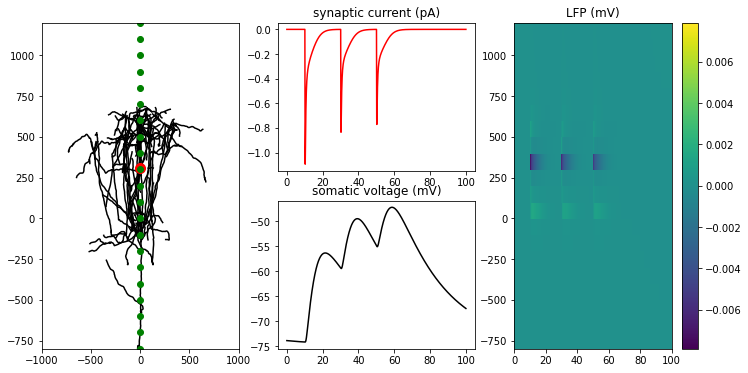

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(133)
plt.pcolormesh(cell.tvec, electrode.z, electrode.LFP,
           vmin=-abs(electrode.LFP).max(), vmax=abs(electrode.LFP).max())
plt.colorbar()
plt.title('LFP (mV)')

plt.subplot(232)
plt.plot(cell.tvec, synapse.i, 'r'), plt.title('synaptic current (pA)')

plt.subplot(235)
plt.plot(cell.tvec, cell.somav, 'k'), plt.title('somatic voltage (mV)')

plt.subplot(131)
for sec in LFPy.cell.neuron.h.allsec():
    idx = cell.get_idx(sec.name())
    plt.plot(np.r_[cell.xstart[idx], cell.xend[idx][-1]],
            np.r_[cell.zstart[idx], cell.zend[idx][-1]],
            color='k')
plt.plot([cell.synapses[0].x], [cell.synapses[0].z], 
     color='r', marker='o', markersize=10)
plt.plot(electrode.x, electrode.z, '.', marker='o', color='g')
plt.axis([-1000, 1000, -800, 1200])


At the level of the synapse, we see brief negative deflections in the LFP signal at 10, 30, and 50 ms, corresponding to the synaptic currents. Positive deflections are visible at electrode positions above and below the synapse, corresponding to the return current. As expected, deflections further from the synapse occur later in time, due to the finite conduction speed of the neuron. The positive deflection is largest at the level of the soma, because the larger surface area and concentration of ion channels permits a larger return current than in the neurites.  

# Ex4. Extracellular field

<font size='3'>Choose one pyramidal cell and one inhibitory cell from your set of cells. Run the code from tutorial 04 for each of the cells and compare the resulted response field for each of them. Explain what differences do you see and why. [1.75 pts] 

   

In [16]:
from matplotlib.collections import PolyCollection

In [29]:
cell_parameters = {
    'morphology' : '../week7/morphs/morph_02.swc', # from Mainen & Sejnowski, J Comput Neurosci, 1996
    'cm' : 1.0,         # membrane capacitance
    'Ra' : 150.,        # axial resistance
    'v_init' : -65.,    # initial crossmembrane potential
    'passive' : True,   # turn on NEURONs passive mechanism for all sections
    'passive_parameters' : {'g_pas' : 1./30000, 'e_pas' : -65},
    'nsegs_method' : 'lambda_f', # spatial discretization method
    'lambda_f' : 100.,           # frequency where length constants are computed
    'dt' : 2.**-3,      # simulation time step size
    'tstart' : 0.,      # start time of simulation, recorders start at t=0
    'tstop' : 100.,     # stop simulation at 100 ms.
}


In [30]:
# Create cell
cell = LFPy.Cell(**cell_parameters)
# Align cell
#cell.set_rotation(x=np.pi/2., y=0., z=np.pi/2., rotation_order='xyz') # angles in radians!!
#cell.set_pos(x=0, y=0, z=0)

error ../week7/morphs/morph_02.swc line 36377: could not parse: 


In [31]:
synapse_parameters = {
    'idx' : cell.get_closest_idx(x=-200., y=0., z=800.),
    'e' : 0.,                   # reversal potential
    'syntype' : 'ExpSyn',       # synapse type
    'tau' : 5.,                 # synaptic time constant
    'weight' : 0.1,             # synaptic weight
    'record_current' : True,    # record synapse current
}

# Create a grid of measurement locations, in (mum)
X, Z = np.mgrid[-700:701:50, -400:1201:50]
Y = np.zeros(X.shape)

# Define electrode parameters
grid_electrode_parameters = {
    'sigma' : 0.3,      # extracellular conductivity
    'x' : X.flatten(),  # electrode requires 1d vector of positions
    'y' : Y.flatten(),
    'z' : Z.flatten()
}

# Define electrode parameters
point_electrode_parameters = {
    'sigma' : 0.3,  # extracellular conductivity
    'x' : np.array([-130., -220.]),
    'y' : np.array([   0.,    0.]),
    'z' : np.array([   0.,  700.]),
}

In [32]:
synapse = LFPy.Synapse(cell, **synapse_parameters)
synapse.set_spike_times(np.array([20.]))

In [33]:
# Run simulation, electrode object argument in cell.simulate
cell.simulate(rec_imem=True)

# Create electrode objects
grid_electrode = LFPy.RecExtElectrode(cell,**grid_electrode_parameters)
point_electrode = LFPy.RecExtElectrode(cell,**point_electrode_parameters)

# Calculate LFPs
grid_electrode.calc_lfp()
point_electrode.calc_lfp()

[]

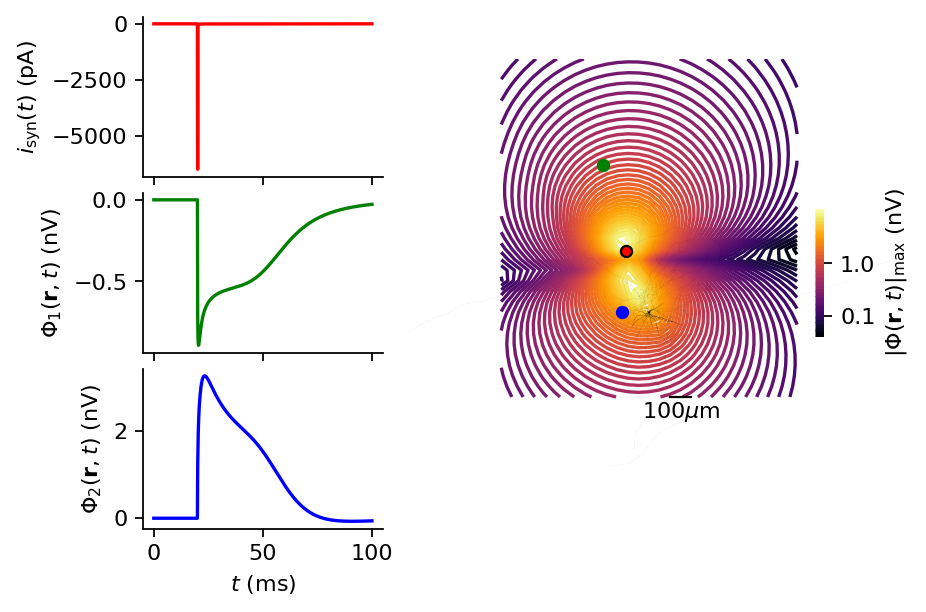

In [34]:
fig = plt.figure(dpi=160)

ax = fig.add_axes([.4,.1,.55,.8], aspect='equal', frameon=False)
cax = fig.add_axes([0.85, 0.4, 0.01, 0.2], frameon=False)

LFP = np.max(np.abs(grid_electrode.LFP),1).reshape(X.shape)
im = ax.contour(X, Z, np.log10(LFP), 
            50,
           cmap='inferno',
           zorder=-2)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('$|\Phi(\mathbf{r}, t)|_\mathrm{max}$ (nV)')
cbar.outline.set_visible(False)
##get some log-linear tickmarks and ticklabels
ticks = np.arange(np.ceil(np.log10(LFP.min())), np.floor(np.log10(LFP.max())))
cbar.set_ticks(ticks)
cbar.set_ticklabels(np.round(10.**ticks * 1E6, decimals=1)) #mV -> nV

#plot morphology
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
polycol = PolyCollection(zips,
                         edgecolors='none',
                         facecolors='k')
ax.add_collection(polycol)

ax.plot([100, 200], [-400, -400], 'k', lw=1, clip_on=False)
ax.text(150, -470, r'100$\mu$m', va='center', ha='center')

ax.axis('off')


ax.plot(cell.xmid[cell.synidx],cell.zmid[cell.synidx], 'o', ms=5,
        markeredgecolor='k',
        markerfacecolor='r')

color_vec = ['blue','green']
for i in range(2):
    ax.plot(point_electrode_parameters['x'][i],
                    point_electrode_parameters['z'][i],'o',ms=6,
                    markeredgecolor='none',
                    markerfacecolor=color_vec[i])

plt.axes([.15,.10,.25,.25])
plt.plot(cell.tvec,point_electrode.LFP[0]*1e6,color=color_vec[0], clip_on=False)
plt.ylabel(r'$\Phi_2(\mathbf{r},t)$ (nV)')
plt.xlabel(r'$t$ (ms)')
plt.axis('tight')
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ['right', 'top']:
        spine.set_color('none')            
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.axes([.15,.375,.25,.25])
plt.plot(cell.tvec,point_electrode.LFP[1]*1e6,color=color_vec[1], clip_on=False)
plt.ylabel(r'$\Phi_1(\mathbf{r}, t)$ (nV)')
plt.axis('tight')
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ['right', 'top']:
        spine.set_color('none')            
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticklabels([])

plt.axes([.15,.65,.25,.25])
plt.plot(cell.tvec,synapse.i*1E3, color='red', clip_on=False)
plt.ylabel(r'$i_\mathrm{syn}(t)$ (pA)')
plt.axis('tight')
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ['right', 'top']:
        spine.set_color('none')            
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticklabels([])

In [35]:
cell_parameters = {
    'morphology' : '../week7/morphs/morph_04.swc', # from Mainen & Sejnowski, J Comput Neurosci, 1996
    'cm' : 1.0,         # membrane capacitance
    'Ra' : 150.,        # axial resistance
    'v_init' : -65.,    # initial crossmembrane potential
    'passive' : True,   # turn on NEURONs passive mechanism for all sections
    'passive_parameters' : {'g_pas' : 1./30000, 'e_pas' : -65},
    'nsegs_method' : 'lambda_f', # spatial discretization method
    'lambda_f' : 100.,           # frequency where length constants are computed
    'dt' : 2.**-3,      # simulation time step size
    'tstart' : 0.,      # start time of simulation, recorders start at t=0
    'tstop' : 100.,     # stop simulation at 100 ms.
}


In [36]:
# Create cell
cell = LFPy.Cell(**cell_parameters)
# Align cell
#cell.set_rotation(x=np.pi/2., y=0., z=np.pi/2., rotation_order='xyz') # angles in radians!!
#cell.set_pos(x=0, y=0, z=0)

error ../week7/morphs/morph_04.swc line 6922: could not parse: 


In [37]:
synapse_parameters = {
    'idx' : cell.get_closest_idx(x=-200., y=0., z=800.),
    'e' : 0.,                   # reversal potential
    'syntype' : 'ExpSyn',       # synapse type
    'tau' : 5.,                 # synaptic time constant
    'weight' : 0.1,             # synaptic weight
    'record_current' : True,    # record synapse current
}

# Create a grid of measurement locations, in (mum)
X, Z = np.mgrid[-700:701:50, -400:1201:50]
Y = np.zeros(X.shape)

# Define electrode parameters
grid_electrode_parameters = {
    'sigma' : 0.3,      # extracellular conductivity
    'x' : X.flatten(),  # electrode requires 1d vector of positions
    'y' : Y.flatten(),
    'z' : Z.flatten()
}

# Define electrode parameters
point_electrode_parameters = {
    'sigma' : 0.3,  # extracellular conductivity
    'x' : np.array([-130., -220.]),
    'y' : np.array([   0.,    0.]),
    'z' : np.array([   0.,  700.]),
}

In [38]:
synapse = LFPy.Synapse(cell, **synapse_parameters)
synapse.set_spike_times(np.array([20.]))

In [39]:
# Run simulation, electrode object argument in cell.simulate
cell.simulate(rec_imem=True)

# Create electrode objects
grid_electrode = LFPy.RecExtElectrode(cell,**grid_electrode_parameters)
point_electrode = LFPy.RecExtElectrode(cell,**point_electrode_parameters)

# Calculate LFPs
grid_electrode.calc_lfp()
point_electrode.calc_lfp()

[]

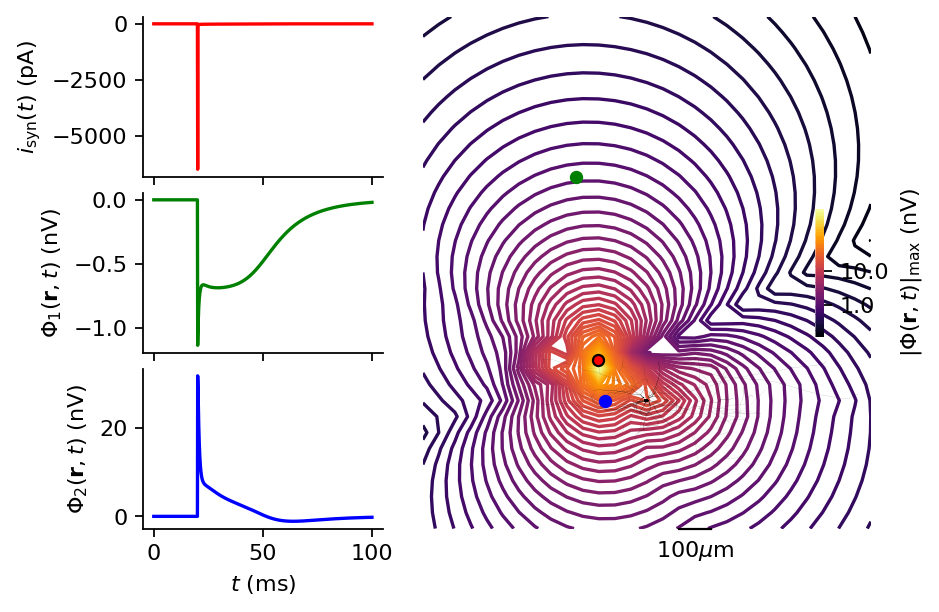

In [40]:
fig = plt.figure(dpi=160)

ax = fig.add_axes([.4,.1,.55,.8], aspect='equal', frameon=False)
cax = fig.add_axes([0.85, 0.4, 0.01, 0.2], frameon=False)

LFP = np.max(np.abs(grid_electrode.LFP),1).reshape(X.shape)
im = ax.contour(X, Z, np.log10(LFP), 
            50,
           cmap='inferno',
           zorder=-2)
cbar = fig.colorbar(im, cax=cax)
cbar.set_label('$|\Phi(\mathbf{r}, t)|_\mathrm{max}$ (nV)')
cbar.outline.set_visible(False)
##get some log-linear tickmarks and ticklabels
ticks = np.arange(np.ceil(np.log10(LFP.min())), np.floor(np.log10(LFP.max())))
cbar.set_ticks(ticks)
cbar.set_ticklabels(np.round(10.**ticks * 1E6, decimals=1)) #mV -> nV

#plot morphology
zips = []
for x, z in cell.get_idx_polygons():
    zips.append(list(zip(x, z)))
polycol = PolyCollection(zips,
                         edgecolors='none',
                         facecolors='k')
ax.add_collection(polycol)

ax.plot([100, 200], [-400, -400], 'k', lw=1, clip_on=False)
ax.text(150, -470, r'100$\mu$m', va='center', ha='center')

ax.axis('off')


ax.plot(cell.xmid[cell.synidx],cell.zmid[cell.synidx], 'o', ms=5,
        markeredgecolor='k',
        markerfacecolor='r')

color_vec = ['blue','green']
for i in range(2):
    ax.plot(point_electrode_parameters['x'][i],
                    point_electrode_parameters['z'][i],'o',ms=6,
                    markeredgecolor='none',
                    markerfacecolor=color_vec[i])

plt.axes([.15,.10,.25,.25])
plt.plot(cell.tvec,point_electrode.LFP[0]*1e6,color=color_vec[0], clip_on=False)
plt.ylabel(r'$\Phi_2(\mathbf{r},t)$ (nV)')
plt.xlabel(r'$t$ (ms)')
plt.axis('tight')
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ['right', 'top']:
        spine.set_color('none')            
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')


plt.axes([.15,.375,.25,.25])
plt.plot(cell.tvec,point_electrode.LFP[1]*1e6,color=color_vec[1], clip_on=False)
plt.ylabel(r'$\Phi_1(\mathbf{r}, t)$ (nV)')
plt.axis('tight')
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ['right', 'top']:
        spine.set_color('none')            
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticklabels([])

plt.axes([.15,.65,.25,.25])
plt.plot(cell.tvec,synapse.i*1E3, color='red', clip_on=False)
plt.ylabel(r'$i_\mathrm{syn}(t)$ (pA)')
plt.axis('tight')
ax = plt.gca()
for loc, spine in ax.spines.items():
    if loc in ['right', 'top']:
        spine.set_color('none')            
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticklabels([])

We notice that in the inhibitory cell, the LFP recorded at electrode 2 has a significantly greater amplitude and faster time course than in the excitatory cell. This suggests that stimulus triggered an action potential in the inhibitory cell, but not the excitatory cell. For both cells, the field far from the electrode is similar to the field due to an ideal current dipole. However, for the inhibitory cell, there is greater asymmetry in the near field. This indicates that the details of cell morphology play a greater role in the field distribution; this is likely due to active currents caused by the action potential in this cell.